In [1]:
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import cv2
import pickle 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from PIL import Image
import pandas as pd

In [2]:
filelist = glob.glob('dataset/*.jpg')

x = np.array([np.array(Image.open(fname)) for fname in filelist])
x.shape

C:\Users\arjun\AppData\Local\Temp\ipykernel_8648\3446257290.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array([np.array(Image.open(fname)) for fname in filelist])


(663,)

In [3]:
y = np.array([int(i.split('_')[0].split('\\')[1]) for i in filelist])

In [4]:
resized_x = np.array([cv2.resize(i,(64,64)) for i in x])

In [5]:
x_train, x_test, y_train, y_test = train_test_split(resized_x, y, test_size=0.1, random_state=2)


In [6]:
scaled_x_train = x_train / 255.0 #rescaling
scaled_x_test = x_test / 255.0

In [7]:
data_augmentation = keras.Sequential([
          layers.RandomFlip("horizontal",input_shape=(64,64,3)),
          layers.RandomRotation(0.1),
          layers.RandomZoom(0.1),
        ])

In [8]:
cnn = models.Sequential([
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
    
        layers.Dropout(0.2),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(5, activation='softmax')
    ])

In [9]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
cnn.fit(scaled_x_train, y_train, epochs=50)

Epoch 1/50
19/19 [==============================] - 2s 79ms/step - loss: 1.6474 - accuracy: 0.2164
Epoch 2/50
19/19 [==============================] - 1s 79ms/step - loss: 1.5849 - accuracy: 0.2567
Epoch 3/50
19/19 [==============================] - 2s 91ms/step - loss: 1.4475 - accuracy: 0.4128
Epoch 4/50
19/19 [==============================] - 2s 109ms/step - loss: 1.2289 - accuracy: 0.5000
Epoch 5/50
19/19 [==============================] - 2s 86ms/step - loss: 0.9507 - accuracy: 0.6460
Epoch 6/50
19/19 [==============================] - 2s 95ms/step - loss: 0.8205 - accuracy: 0.7064
Epoch 7/50
19/19 [==============================] - 2s 108ms/step - loss: 0.6183 - accuracy: 0.7903
Epoch 8/50
19/19 [==============================] - 2s 110ms/step - loss: 0.4562 - accuracy: 0.8591
Epoch 9/50
19/19 [==============================] - 2s 92ms/step - loss: 0.3499 - accuracy: 0.9027
Epoch 10/50
19/19 [==============================] - 2s 107ms/step - loss: 0.2891 - accuracy: 0.9312
Epoch

In [19]:
cnn.evaluate(scaled_x_test,y_test)

3/3 [==============================] - 0s 10ms/step - loss: 0.9543 - accuracy: 0.8358


[0.9542693495750427, 0.8358209133148193]

In [12]:
cnn.predict(scaled_x_test[12].reshape(1,64,64,3))

array([[9.1695343e-04, 1.9970111e-07, 1.5964682e-07, 6.2980698e-06,
        9.9907637e-01]], dtype=float32)

In [13]:
np.argmax(cnn.predict(scaled_x_test[12].reshape(1,64,64,3)))

4

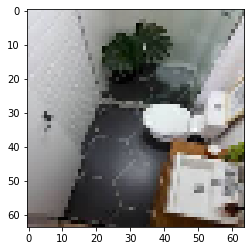

In [14]:
plt.imshow(x_test[12])

In [15]:
predicted = cnn.predict(x_test)

In [16]:
l = []
for i in predicted:
    l.append(np.argmax(i))

In [17]:
np.array(l)

array([4, 3, 3, 3, 4, 4, 4, 0, 2, 0, 3, 0, 4, 1, 3, 1, 4, 0, 4, 2, 1, 4,
       4, 4, 2, 1, 4, 0, 2, 1, 1, 3, 0, 1, 3, 2, 2, 0, 1, 3, 0, 0, 0, 4,
       4, 4, 3, 1, 3, 1, 0, 0, 2, 4, 0, 4, 0, 4, 2, 3, 4, 4, 0, 3, 1, 2,
       1], dtype=int64)

In [18]:
y_test

array([4, 3, 1, 3, 4, 4, 4, 2, 2, 0, 3, 0, 4, 1, 3, 1, 2, 0, 0, 2, 1, 4,
       4, 3, 2, 1, 4, 3, 2, 1, 0, 3, 3, 1, 3, 2, 2, 2, 1, 2, 0, 0, 0, 4,
       4, 4, 3, 1, 3, 1, 0, 0, 2, 4, 0, 4, 0, 4, 2, 3, 4, 4, 0, 3, 1, 2,
       1])